# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [2]:
points = pd.read_csv('points.csv', sep=' ', header = None)

In [3]:
points.head()

,0,1
0,1010.495494,-289.962213
1,1033.563060,-351.183595
2,615.425717,-244.211364
3,942.222194,-245.390831
4,1645.832191,-80.709377


Narysujmy wykres z wyżej wczytanych punktów.

<AxesSubplot:xlabel='0', ylabel='1'>

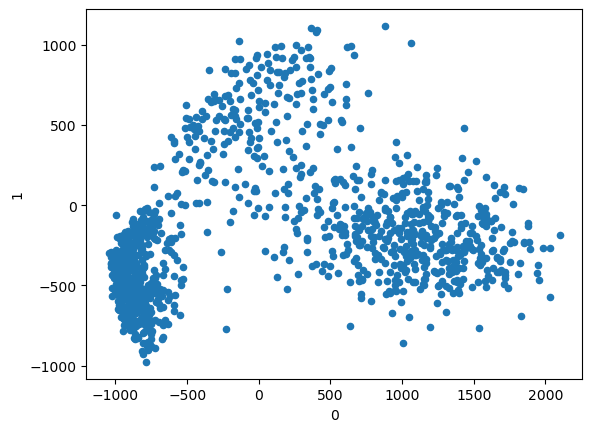

In [4]:
xs = points[0]
ys = points[1]

points.plot(kind = 'scatter', x = 0, y = 1)

**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

In [5]:
3

3

Podstawowym akgorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

In [6]:
from sklearn.cluster import KMeans

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [7]:
kmeans = KMeans(n_clusters = 3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

In [9]:
kmeans.fit(points)

KMeans(n_clusters=3)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

In [10]:
clusters = kmeans.predict(points)

Wyświetlmy, w jaki sposób model podzielił punkty:

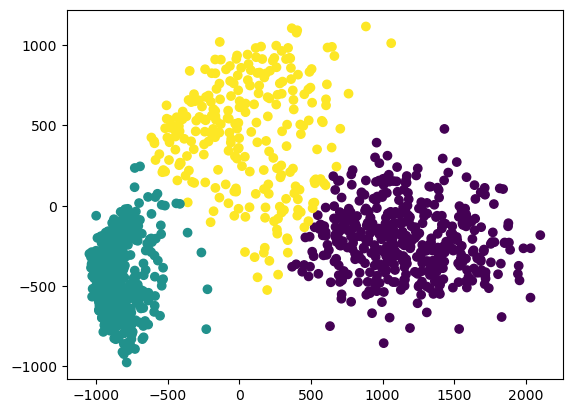

In [11]:
plt.scatter(x = points[0], y = points[1], c = clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [12]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: 1158.9296227871432	Y:-212.2805521175457
Claster ID: 1	X: -844.3076877296984	Y:-450.07153180895216
Claster ID: 2	X: 60.61234354820599	Y:444.8494302023744


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

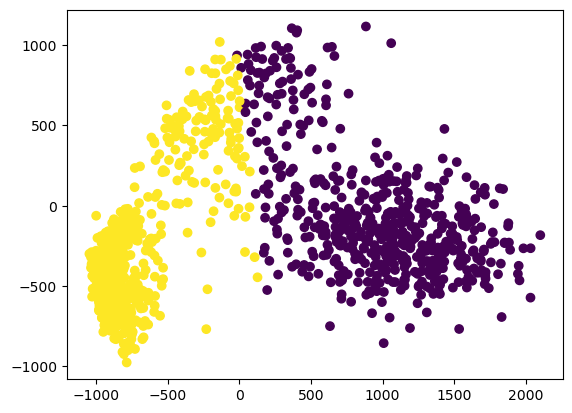

In [14]:
# 2 klastry
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(points)
clusters2 = kmeans2.predict(points)
plt.scatter(x = points[0], y = points[1], c = clusters2)
plt.show()

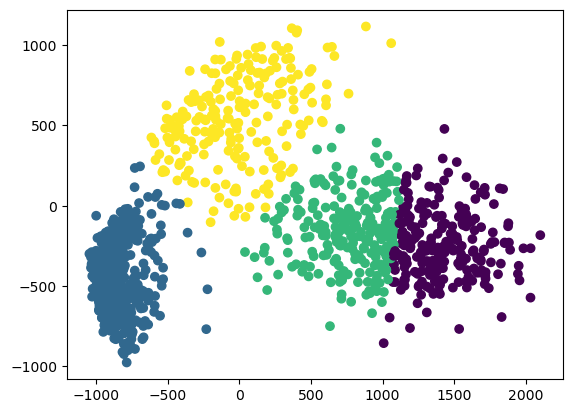

In [15]:
# 4 klastry
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(points)
clusters4 = kmeans4.predict(points)
plt.scatter(x = points[0], y = points[1], c = clusters4)
plt.show()

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


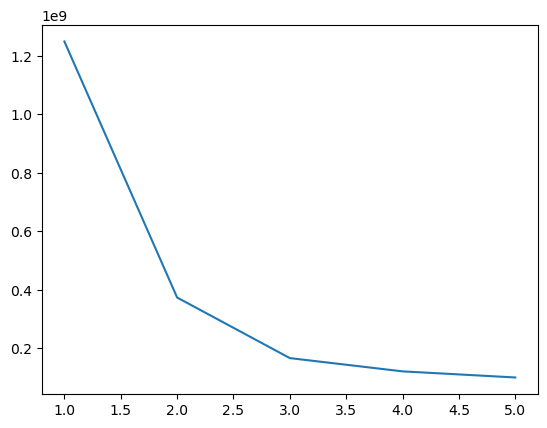

In [16]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [50]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebna do utworzenia klastra.

In [51]:
db = DBSCAN(eps = 130, min_samples = 10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

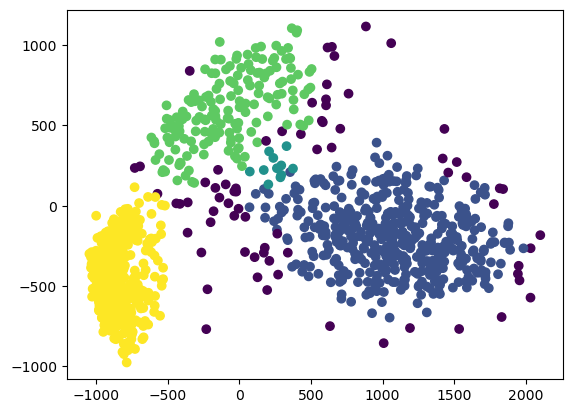

In [64]:
plt.scatter(x = points[0], y = points[1], c = labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

In [105]:
points.head()

,0,1
0,1010.495494,-289.962213
1,1033.563060,-351.183595
2,615.425717,-244.211364
3,942.222194,-245.390831
4,1645.832191,-80.709377


In [54]:
points.mean(axis=0)

0     75.237773
1   -175.542581
dtype: float64

In [55]:
points.std(axis=0)

0    929.878586
1    419.815724
dtype: float64

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(points)
points_scaled = scaler.transform(points)

In [57]:
points_scaled = pd.DataFrame(points_scaled)

In [58]:
round(points_scaled.mean(axis=0),0)

0    0.0
1    0.0
dtype: float64

In [59]:
points_scaled.std(axis=0)

0    1.000417
1    1.000417
dtype: float64

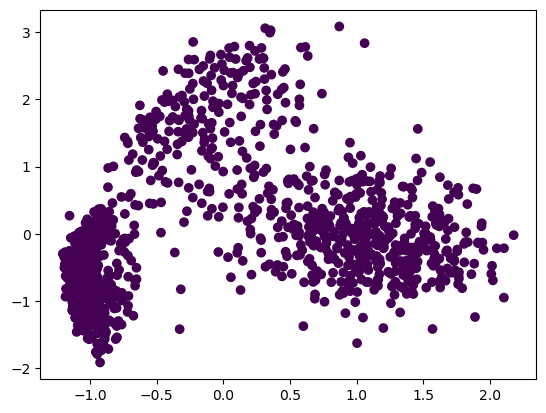

In [62]:
# DBSCAN dla eps = 130
db = DBSCAN(eps=130, min_samples=10)
labels_scaled = db.fit_predict(points_scaled)
plt.scatter(x = points_scaled[0], y = points_scaled[1], c = labels_scaled)
plt.show()

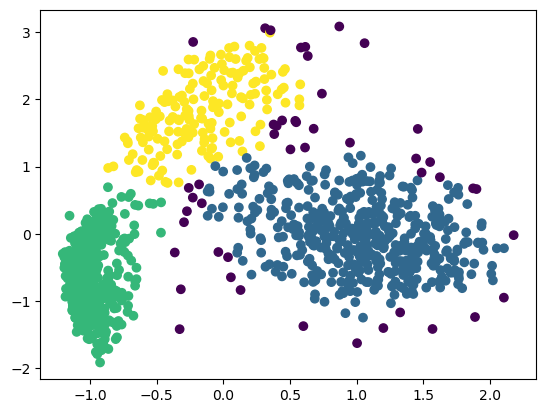

In [131]:
# DBSCAN dla eps = 0.238, min_samples = 10
db_a = DBSCAN(eps = 0.238, min_samples = 10)
labels_scaled_a = db_a.fit_predict(points_scaled)
plt.scatter(x = points_scaled[0], y = points_scaled[1], c = labels_scaled_a)
plt.show()

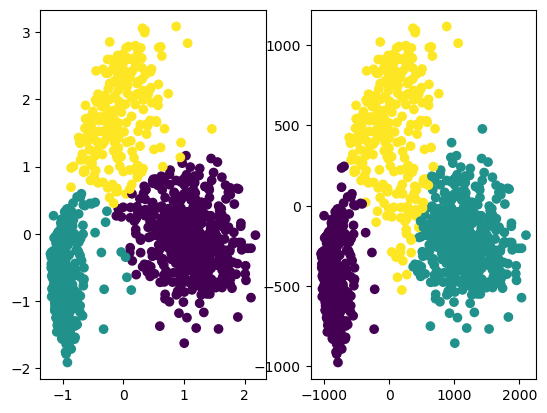

In [100]:
# k-means dla przeskalowanych danych
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(points_scaled)
clusters3 = kmeans3.predict(points_scaled)

fig, (plt1, plt2) = plt.subplots(1,2)
# Wykres 1 - przeskalowane dane
plt1.scatter(x = points_scaled[0], y = points_scaled[1], c = clusters3)
# Wykres 2 - dane bez skalowania
plt2.scatter(x = points[0], y = points[1], c = clusters)
plt.show()

### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [132]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [ ]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target

Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [142]:
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

In [143]:
mnist_pca = pca.transform(X)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clasters` numer klastra, do którego został on przydzielony.

In [146]:
kmeans10 = KMeans(n_clusters = 10)
kmeans10.fit(mnist_pca)
clusters10 = kmeans10.predict(mnist_pca)

In [147]:
clusters10

array([5, 9, 7, ..., 0, 8, 3])

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

array([1, 7, 8, 3, 0, 2, 4, 1, 6, 0])

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

0.5762857142857143

**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.

**Gratuluję!**